In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

# Data Loading

In [10]:
HORIZON = "1h"   #change this to train each model

DATA_PATH = f"/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_1/data/sequences/Bitcoin/{HORIZON}/"
X_train = np.load(DATA_PATH + "X_train.npy")
y_train = np.load(DATA_PATH + "y_train.npy")
X_val   = np.load(DATA_PATH + "X_val.npy")
y_val   = np.load(DATA_PATH + "y_val.npy")
X_test  = np.load(DATA_PATH + "X_test.npy")
y_test  = np.load(DATA_PATH + "y_test.npy")


print("Loaded shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Loaded shapes:
X_train: (30646, 48, 12)
y_train: (30646,)
X_val: (6567, 48, 12)
y_val: (6567,)
X_test: (6568, 48, 12)
y_test: (6568,)


# Modle Building

In [11]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),

    LSTM(32),
    Dropout(0.2),

    Dense(16, activation="relu"),
    Dense(1)  
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mse",
    metrics=['mae']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 48, 64)         │        19,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,673 (127.63 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

# Call Backs

In [12]:
os.makedirs("models", exist_ok=True)

checkpoint = ModelCheckpoint(
    f"models/lstm_{HORIZON}.h5",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

# Train

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/100


2025-12-08 00:10:37.491269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0312 - mae: 0.1223
Epoch 1: val_loss improved from None to 0.01409, saving model to models/lstm_1h.h5


479/479 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0192 - mae: 0.0869 - val_loss: 0.0141 - val_mae: 0.0793
Epoch 2/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0014 - mae: 0.0283
Epoch 2: val_loss did not improve from 0.01409
479/479 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0011 - mae: 0.0247 - val_loss: 0.0284 - val_mae: 0.1061
Epoch 3/100
477/479 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8913e-04 - mae: 0.0226
Epoch 3: val_loss did not improve from 0.01409
479/479 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0010 - mae: 0.0241 - val_loss: 0.0411 - val_mae: 0.1465
Epoch 4/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0012 - mae: 0.0265
Epoch 4: val_loss did not improve from 0.01409
479/479 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0010 - mae: 0.0240 - val_loss: 0.0315 - val_mae: 0.1179
Epoch 5/100
479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0013 - mae: 0.0271
Epoch 5: val_loss did not improve from 0.01409
479/479 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/st

# Visualization

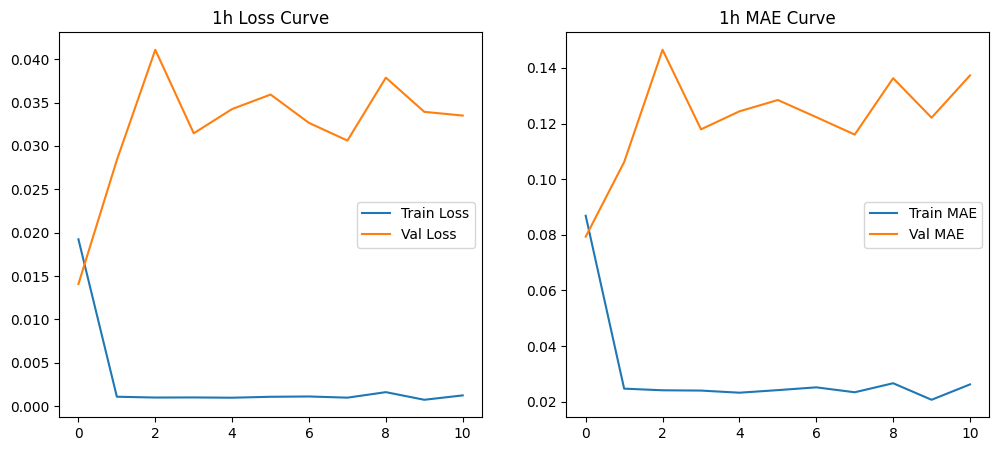

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title(f"{HORIZON} Loss Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.title(f"{HORIZON} MAE Curve")
plt.legend()

plt.show()

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


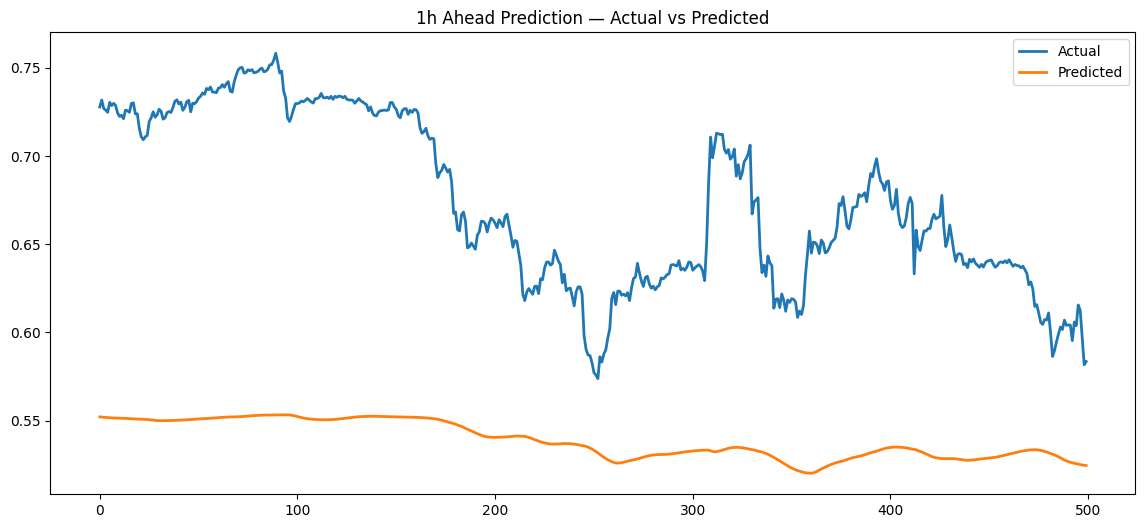

In [18]:
preds = model.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_test[:500], label="Actual", linewidth=2)
plt.plot(preds[:500], label="Predicted", linewidth=2)
plt.title(f"{HORIZON} Ahead Prediction — Actual vs Predicted")
plt.legend()
plt.show()

# Evaluation

In [19]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("\n======= TEST PERFORMANCE =======")
print("Loss:", test_loss)
print("MAE :", test_mae)

206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0686 - mae: 0.2448

======= TEST PERFORMANCE =======
Loss: 0.06860190629959106
MAE : 0.24476128816604614


# Comparison with Xgboost

Persistence baseline → MAE: 0.0039, RMSE: 0.0057, MAPE%: 0.50, R2: 0.9973
LSTM model → MAE: 0.2448, RMSE: 0.2619, MAPE%: 29.10, R2: -4.6869
[0]	validation_0-rmse:0.37948
[50]	validation_0-rmse:0.19050
[100]	validation_0-rmse:0.16076
[150]	validation_0-rmse:0.15483
[200]	validation_0-rmse:0.15334
[250]	validation_0-rmse:0.15305
[299]	validation_0-rmse:0.15308
XGBoost (flattened-window) → MAE: 0.3118, RMSE: 0.3308, MAPE%: 37.60, R2: -8.0699


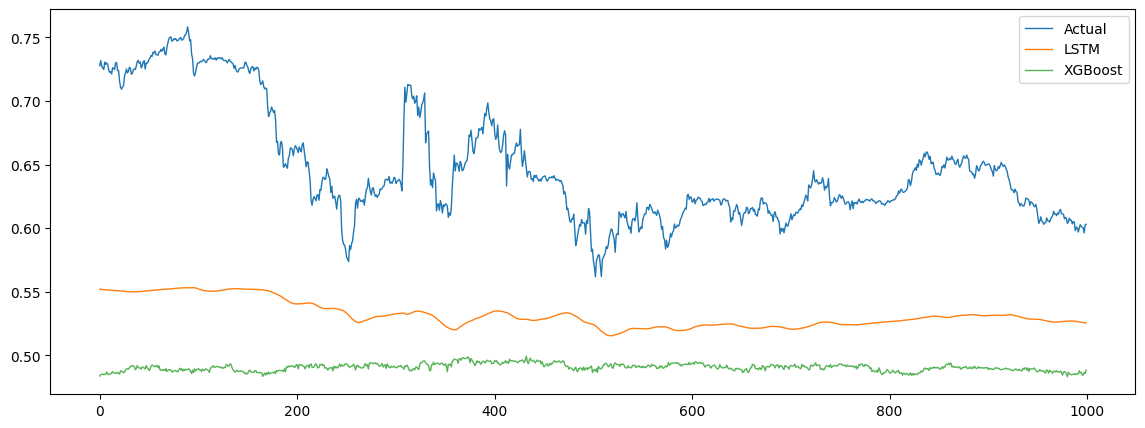

In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


feature_cols = [
    "open","high","low","close","volume",
    "return_1h","volatility_24h",
    "ma_24","ma_168","ma_ratio",
    "vol_change","missing_flag"
]

# assume you have X_train, X_val, X_test, y_train, y_val, y_test and preds (unscaled real prices)
def print_metrics(y, yhat, label="Model"):
    mae  = mean_absolute_error(y, yhat)
    mse  = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y - yhat) / (y + 1e-9))) * 100
    r2   = r2_score(y, yhat)

    print(f"{label} → MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE%: {mape:.2f}, R2: {r2:.4f}")

# baseline: persistence (last close in sequence)
baseline_test = X_test[:, -1, feature_cols.index("close")]
print_metrics(y_test, baseline_test, "Persistence baseline")
print_metrics(y_test, preds, "LSTM model")

# Quick XGBoost on flattened sequences
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat   = X_val.reshape(X_val.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.03, max_depth=6, tree_method='hist')
xgb_model.fit(
    X_train_flat, y_train,
    eval_set=[(X_val_flat, y_val)],
    verbose=50
)
pred_xgb = xgb_model.predict(X_test_flat)

print_metrics(y_test, pred_xgb, "XGBoost (flattened-window)")

# Plot a segment
n = 1000
plt.figure(figsize=(14,5))
plt.plot(y_test[:n], label='Actual', linewidth=1)
plt.plot(preds[:n], label='LSTM', linewidth=1)
plt.plot(pred_xgb[:n], label='XGBoost', linewidth=1, alpha=0.8)
plt.legend(); plt.show()

# Saving Model

In [21]:
COIN_NAME = "Bitcoin"     
HORIZON   = "1h"              

BASE_PATH = "/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_2/model"


SAVE_DIR = f"{BASE_PATH}/{COIN_NAME}"
os.makedirs(SAVE_DIR, exist_ok=True)


save_path = f"{SAVE_DIR}/lstm_{COIN_NAME}_{HORIZON}_final.keras"
model.save(save_path)

print("Model saved successfully at:")
print(save_path)

Model saved successfully at:
/Users/ayushgupta/Desktop/ML-Driven-Web-Platform-for-Cryptocurrency-Price-Forecasting_November_Batch-5_2025/Milestone_2/model/Bitcoin/lstm_Bitcoin_1h_final.keras
